In [2]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Import Data
data_train = pd.read_csv('C:/Users/anil.corut/Desktop/titanic/train.csv')
data_test = pd.read_csv('C:/Users/anil.corut/Desktop/titanic/test.csv')

data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S


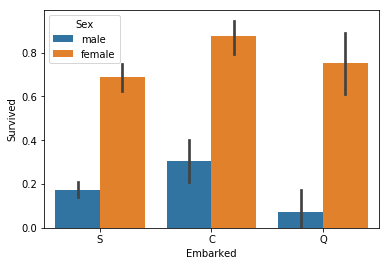

In [4]:
# Basic Visualizations
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train)

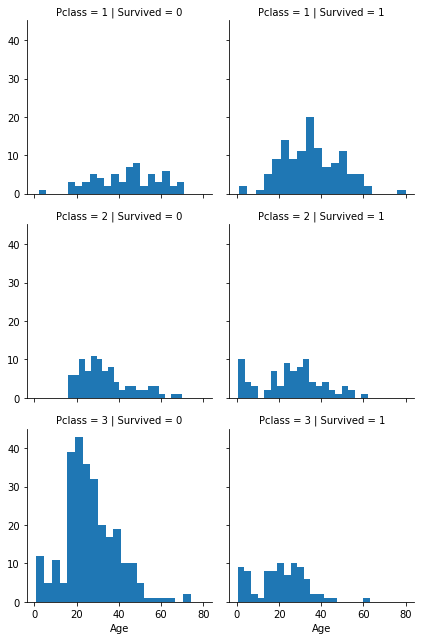

In [5]:
g = sns.FacetGrid(data_train, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)

In [6]:
# Data Summary for Numeric Variables
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Data Summary for Non-Numeric Variables
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Canavan, Miss. Mary",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
# Number of NA records
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
# Missing Data
# fill.na vs. Imputer function
# Imputer enables you to put mean etc by a grouping.
data_cleaner = [data_train, data_test]
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    #complete missing cabin with a value
    dataset['Cabin'] = dataset['Cabin'].fillna('N')

In [62]:
# Create New Variables
def simplify_ages(df):
    #df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    df['AgeBin'] = pd.cut(df.Age, bins, labels=group_names)
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    df['FareBin'] = pd.cut(df.Fare, bins, labels=group_names)
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['PassengerId', 'Ticket', 'Name'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeBin,FareBin,Lname,NamePrefix
0,0,3,male,22.0,1,0,7.2500,N,S,Student,1_quartile,"Braund,",Mr.
1,1,1,female,38.0,1,0,71.2833,C85,C,Adult,4_quartile,"Cumings,",Mrs.
2,1,3,female,26.0,0,0,7.9250,N,S,Young Adult,1_quartile,"Heikkinen,",Miss.
3,1,1,female,35.0,1,0,53.1000,C123,S,Young Adult,4_quartile,"Futrelle,",Mrs.
4,0,3,male,35.0,0,0,8.0500,N,S,Young Adult,2_quartile,"Allen,",Mr.


In [11]:
# Look Data Values for Categoric Variables
for colname in data_train.columns:
    if str(data_train[colname].dtype) == 'category':
        print("_",colname,"_")
        print(data_train[colname].value_counts())
        print("----------------")

_ AgeBin _
Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Senior          22
Unknown          0
Name: AgeBin, dtype: int64
----------------
_ FareBin _
1_quartile    226
4_quartile    222
2_quartile    217
3_quartile    211
Unknown        15
Name: FareBin, dtype: int64
----------------


In [12]:
data_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeBin,FareBin,Lname,NamePrefix
0,0,3,male,22.0,1,0,7.2500,N,S,Student,1_quartile,"Braund,",Mr.
1,1,1,female,38.0,1,0,71.2833,C85,C,Adult,4_quartile,"Cumings,",Mrs.
2,1,3,female,26.0,0,0,7.9250,N,S,Young Adult,1_quartile,"Heikkinen,",Miss.


In [63]:
# Encode String Data
from sklearn import preprocessing

def encode_features(data_train, data_test):
    features = ['Cabin', 'Sex', 'Lname', 'NamePrefix', 'Embarked','AgeBin','FareBin']
    df_combined = pd.concat([data_train[features], data_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        data_train[feature] = le.transform(data_train[feature])
        data_test[feature] = le.transform(data_test[feature])
    return data_train, data_test
data_train, data_test = encode_features(data_train, data_test)
data_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeBin,FareBin,Lname,NamePrefix
0,0,3,1,22.0,1,0,7.2500,185,2,4,0,100,19
1,1,1,0,38.0,1,0,71.2833,106,0,0,3,182,20
2,1,3,0,26.0,0,0,7.9250,185,2,6,0,329,16


In [114]:
#Common Model Algorithms
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

In [65]:
X_data = data_train.drop(['Survived'], axis=1)
y_data = data_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

In [23]:
clf = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

C:\Users\anil.corut\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\anil.corut\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
# Fit the best algorithm to the data. 
predictions = clf.predict(X_test)

In [19]:
# Model Accuracy
print("accuracy:")
print(metrics.accuracy_score(y_test, predictions))
print("---------------")

print("confusion_matrix:")
print(metrics.confusion_matrix(y_test,predictions))
print("---------------")

print("auc:")
fp, tp, thresholds = metrics.roc_curve(y_test,predictions)
auc = metrics.auc(fp,tp)
print('%.3f'% auc)
print("---------------")

print("gini:")
print('%.3f'% (2*auc-1))
print("---------------")

print("Report:")
print(metrics.classification_report(y_test,predictions))

accuracy:
0.776536312849162
---------------
confusion_matrix:
[[96 10]
 [30 43]]
---------------
auc:
0.747
---------------
gini:
0.495
---------------
Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       106
           1       0.81      0.59      0.68        73

   micro avg       0.78      0.78      0.78       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179



In [51]:
def run_kfold(clf):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)


TypeError: 'KFold' object is not iterable

In [42]:
from sklearn.model_selection import KFold

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeBin,FareBin,Lname,NamePrefix
1,1,0,38.0,1,0,71.2833,106,0,0,3,182,20
2,3,0,26.0,0,0,7.9250,185,2,6,0,329,16
3,1,0,35.0,1,0,53.1000,70,2,6,3,267,20
4,3,1,35.0,0,0,8.0500,185,2,6,1,15,19
5,3,1,28.0,0,0,8.4583,185,1,6,1,538,19
6,1,1,54.0,0,0,51.8625,163,2,0,3,500,19
7,3,1,2.0,3,1,21.0750,185,2,1,2,608,13
8,3,0,27.0,0,2,11.1333,185,2,6,1,382,20
9,2,0,14.0,1,0,30.0708,185,0,5,2,559,20


In [89]:
X_data.values[train_index]

array([[  3.,   1.,  29., ...,   1., 147.,  19.],
       [  3.,   1.,  20., ...,   0.,  22.,  19.],
       [  1.,   1.,  46., ...,   3., 137.,  19.],
       ...,
       [  3.,   0.,  28., ...,   2., 383.,  16.],
       [  1.,   1.,  26., ...,   2.,  69.,  19.],
       [  3.,   1.,  32., ...,   0., 214.,  19.]])

In [122]:
X_data = data_train.drop(['Survived'], axis=1)
y_data = data_train['Survived']
scores = []
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

cv = KFold(n_splits=10, random_state=42, shuffle=False)

fold = 0
for train_index, test_index in cv.split(X_data):
    
    fold += 1
    X_train, X_test, y_train, y_test = X_data.values[train_index], X_data.values[test_index], y_data.values[train_index], y_data.values[test_index]
    clf.fit(X_train, y_train)
    
    predictions = clf.predict(X_test)
    fp, tp, thresholds = metrics.roc_curve(y_test,predictions)
    auc = metrics.auc(fp,tp)
    print("fold", fold,":", auc)
    

fold 1 : 0.7941176470588235
fold 2 : 0.8347826086956522
fold 3 : 0.7802139037433156
fold 4 : 0.8547979797979798
fold 5 : 0.8516112266112266
fold 6 : 0.8067434210526315
fold 7 : 0.7276923076923076
fold 8 : 0.7280844155844155
fold 9 : 0.8991525423728814
fold 10 : 0.8252164502164503


In [123]:
auc

0.8252164502164503

In [ ]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))